In [207]:
import numpy as np
import pandas as pd
import plotly.express as px
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from imblearn.over_sampling import SMOTE

## IOD Mini Project2:

# Aim: Predict customers who will potentially leave the service

Find characteristics of customers who will stop the service. Find solutions and methods to retain customers.


Read the data

In [179]:
pd.set_option('display.max_columns',100)
df =pd.read_csv("/Users/maxkim/Desktop/DS Camp/WA_Fn-UseC_-Telco-Customer-Churn.csv")
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [180]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [181]:
# Convert 'TotalCharges' to numeric
df['TotalCharges'] =pd.to_numeric(df['TotalCharges'], errors ="coerce")
# Convert seniorcitizen as object
df['SeniorCitizen'] = df['SeniorCitizen'].astype('object')

In [182]:
# Look for any missing value
df.isnull().sum()

customerID           0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

In [183]:
# List of 11 missing values
df[np.isnan(df['TotalCharges'])]

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
488,4472-LVYGI,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,No,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,NaN,No
753,3115-CZMZD,Male,0,No,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,NaN,No
936,5709-LVOEQ,Female,0,Yes,Yes,0,Yes,No,DSL,Yes,Yes,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,NaN,No
1082,4367-NUYAO,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,NaN,No
1340,1371-DWPAZ,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,Yes,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,NaN,No
3331,7644-OMVMY,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.85,NaN,No
3826,3213-VVOLG,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,NaN,No
4380,2520-SGTTA,Female,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,NaN,No
5218,2923-ARZLG,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,NaN,No
6670,4075-WKNIU,Female,0,Yes,Yes,0,Yes,Yes,DSL,No,Yes,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,NaN,No


These 11 values has tenure of 0. Meaning they are newly joining. For this prediction, I will drop those 11 rows

In [184]:
# Remove isnull values
df.dropna(inplace =True)
# Remove irrelevant columns from the data
df2 =df.drop(labels='customerID', axis=1)

In [185]:
# Check categorical variables
df2.dtypes=='object'
cat_var=[i for i in df2.columns if df2[i].dtypes=='object']
for z in cat_var:
    print(df2[z].name,':',df2[z].unique())

gender : ['Female' 'Male']
SeniorCitizen : [0 1]
Partner : ['Yes' 'No']
Dependents : ['No' 'Yes']
PhoneService : ['No' 'Yes']
MultipleLines : ['No phone service' 'No' 'Yes']
InternetService : ['DSL' 'Fiber optic' 'No']
OnlineSecurity : ['No' 'Yes' 'No internet service']
OnlineBackup : ['Yes' 'No' 'No internet service']
DeviceProtection : ['No' 'Yes' 'No internet service']
TechSupport : ['No' 'Yes' 'No internet service']
StreamingTV : ['No' 'Yes' 'No internet service']
StreamingMovies : ['No' 'Yes' 'No internet service']
Contract : ['Month-to-month' 'One year' 'Two year']
PaperlessBilling : ['Yes' 'No']
PaymentMethod : ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
Churn : ['No' 'Yes']


In [186]:
# Change duplicate features
dup_features =['OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies']
for i in dup_features:
    df2[i] =df2[i].apply(lambda x: 'No' if x =='No internet service' else x)
df2.MultipleLines =df.MultipleLines.apply(lambda x: 'No' if x =='No phone service' else x)

In [187]:
for z in [i for i in df2.columns if df2[i].dtypes =='object']:
    print(df2[z].name, ':', df2[z].unique())

gender : ['Female' 'Male']
SeniorCitizen : [0 1]
Partner : ['Yes' 'No']
Dependents : ['No' 'Yes']
PhoneService : ['No' 'Yes']
MultipleLines : ['No' 'Yes']
InternetService : ['DSL' 'Fiber optic' 'No']
OnlineSecurity : ['No' 'Yes']
OnlineBackup : ['Yes' 'No']
DeviceProtection : ['No' 'Yes']
TechSupport : ['No' 'Yes']
StreamingTV : ['No' 'Yes']
StreamingMovies : ['No' 'Yes']
Contract : ['Month-to-month' 'One year' 'Two year']
PaperlessBilling : ['Yes' 'No']
PaymentMethod : ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
Churn : ['No' 'Yes']


EDA

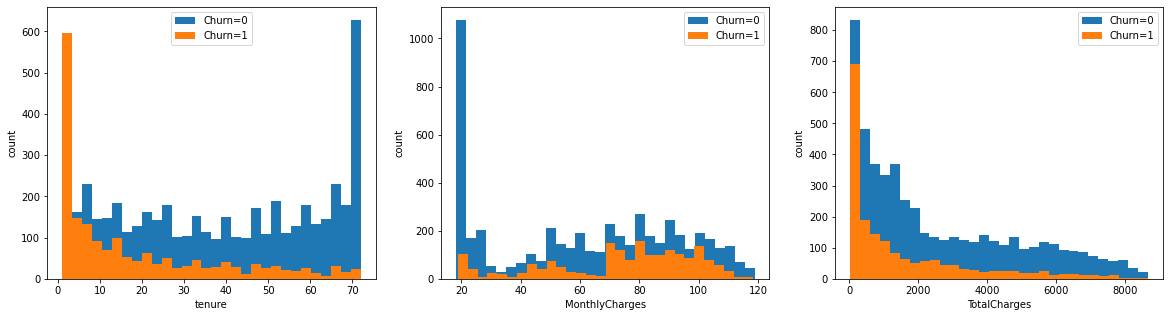

In [188]:
# For visualization, change 'SeniorCitizen' to show as Yes/No
df2.SeniorCitizen= df2.SeniorCitizen.apply(lambda x : 'No' if x == 0 else 'Yes')

# Continuous Variables
continues_var=[i for i in df2.columns if df2[i].dtypes !='object']
fig,ax = plt.subplots(1,3,figsize=(20,5))
for i,x in enumerate(continues_var):
    ax[i].hist(df2[x][df2.Churn=='No'],label='Churn=0',bins=30)
    ax[i].hist(df2[x][df2.Churn=='Yes'],label='Churn=1',bins=30)
    ax[i].set(xlabel=x,ylabel='count')
    ax[i].legend()

Churn vs Tenure
We can see that the longer the subscription, higher to continue their subscription. 
People who are discontinuing their subscription tends to have shorter tenure.

Churn vs MonthlyCharges
Customers who discontinuing their subscription tends to pay higher amount for monthly charges.
Customers who are continuing their subscription tends to have relatively cheaper monthly cost

Churn vs TotalCharges
Even customers who discontinue the subscription pay more monthly, customers who are stay on end up paying higher amounts of total charges.

For categorical, we want to see for people who are stopping their subscription

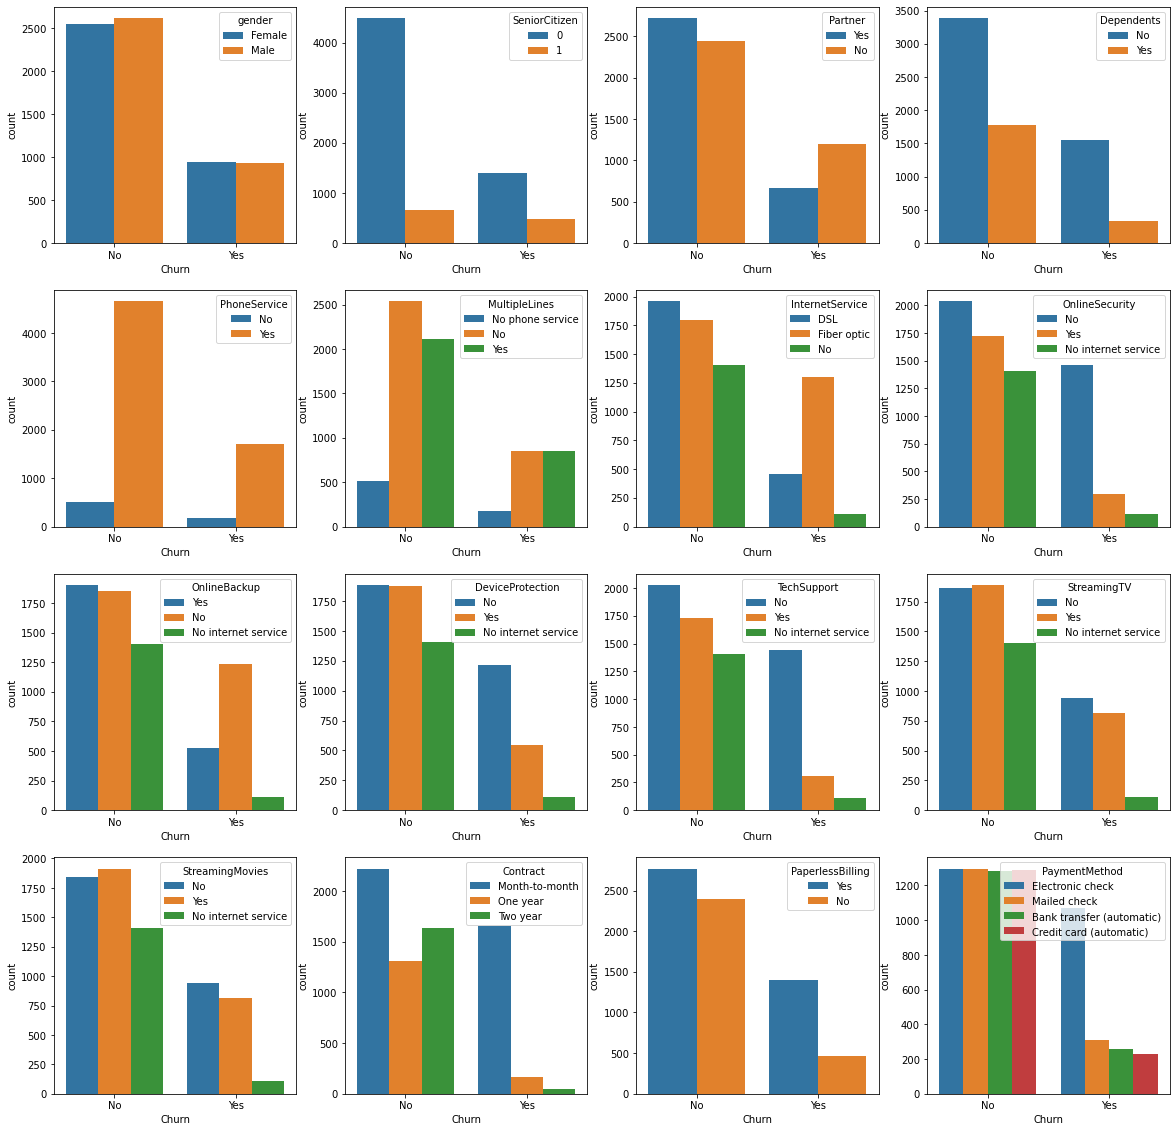

In [189]:
categorical_var=cat_var[:-1]
#Count Plot all Categorical Variables
fig,ax = plt.subplots(4,4,figsize=(20,20))
for axi,var in zip(ax.flat,categorical_var):
    sns.countplot(x=df2.Churn,hue=df[var],ax=axi)

Conclusion with categorical information analysis:
1. Mostly non-senior citizens are stop the subscription.
2. Prefer month-to-month contract with paperless billing
3. People who stop the subscription tends to not sign for any additional services such as tech support, device protection, online backup, online security...
4. Mostly using Fiber optic internet service

In [206]:
# 2-class cateogorical convert to 1 & 0
label_encoder = LabelEncoder()
for x in [i for i in df2.columns if len(df2[i].unique())==2]:
    df2[x]= label_encoder.fit_transform(df[x])
    
# 3+ class cateogorical convert using dummy variables
df3 = pd.get_dummies(df2, columns= [i for i in df2.columns if df2[i].dtypes=='object'],drop_first=True)

# Check
[[x, df3[x].unique()] for x in [i for i in df3.columns if len(df3[i].unique())<10]]

[['gender', array([0, 1])],
 ['SeniorCitizen', array([0, 1])],
 ['Partner', array([1, 0])],
 ['Dependents', array([0, 1])],
 ['PhoneService', array([0, 1])],
 ['MultipleLines', array([1, 0, 2])],
 ['OnlineSecurity', array([0, 2, 1])],
 ['OnlineBackup', array([2, 0, 1])],
 ['DeviceProtection', array([0, 2, 1])],
 ['TechSupport', array([0, 2, 1])],
 ['StreamingTV', array([0, 2, 1])],
 ['StreamingMovies', array([0, 2, 1])],
 ['PaperlessBilling', array([1, 0])],
 ['Churn', array([0, 1])],
 ['InternetService_Fiber optic', array([0, 1], dtype=uint8)],
 ['InternetService_No', array([0, 1], dtype=uint8)],
 ['Contract_One year', array([0, 1], dtype=uint8)],
 ['Contract_Two year', array([0, 1], dtype=uint8)],
 ['PaymentMethod_Credit card (automatic)', array([0, 1], dtype=uint8)],
 ['PaymentMethod_Electronic check', array([1, 0], dtype=uint8)],
 ['PaymentMethod_Mailed check', array([0, 1], dtype=uint8)]]

In [191]:
X =df3.drop('Churn', axis =1)
y =df3.Churn

In [192]:
#Splitting data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2, random_state = 1)
print('X train size: ', len(X_train))
print('X test size: ', len(X_test))
print('y train size: ', len(y_train))
print('y test size: ', len(y_test))

X train size:  5625
X test size:  1407
y train size:  5625
y test size:  1407


In [212]:
# Scale
sc = StandardScaler()
X_train = sc.fit_transform(X_train)                 # fit_transform: fit(μ and σ calculation) + transform
X_train = pd.DataFrame(X_train, columns=X.columns)
X_test = sc.transform(X_test)                   

X_train.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,PaperlessBilling,MonthlyCharges,TotalCharges,InternetService_Fiber optic,InternetService_No,Contract_One year,Contract_Two year,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,-1.015848,-0.487746,-0.891250,-0.593056,-1.103362,0.317072,-1.026524,0.429348,0.217927,0.207505,0.394392,0.045949,0.038392,0.754556,-1.671063,-0.919356,-1.050698,2.233086,-0.459396,-0.453387,-0.486164,-0.847198,1.943633
1,1.027207,-0.487746,-0.891250,1.725935,1.623228,0.317072,-1.026524,0.429348,0.217927,0.207505,0.394392,0.045949,0.038392,-1.366589,-1.634750,-0.304831,-1.050698,2.233086,-0.459396,2.216427,-0.486164,-0.847198,1.943633
2,1.027207,-0.487746,1.154306,1.725935,1.832966,0.317072,1.098466,1.634144,1.351571,1.337587,1.584316,1.150398,1.142270,-1.366589,0.780946,2.135145,-1.050698,-0.447933,-0.459396,2.216427,-0.486164,1.206295,-0.519526
3,-1.015848,-0.487746,1.154306,-0.593056,1.874914,0.317072,1.098466,1.634144,1.351571,1.337587,-0.795532,1.150398,-1.065487,-1.366589,1.135432,2.441122,0.959682,-0.447933,-0.459396,2.216427,-0.486164,-0.847198,-0.519526
4,1.027207,-0.487746,-0.891250,-0.593056,-1.103362,0.317072,-1.026524,-0.775448,-0.915717,-0.922577,-0.795532,-1.058501,-1.065487,0.754556,-0.759774,-0.907250,-1.050698,-0.447933,-0.459396,-0.453387,-0.486164,-0.847198,1.943633


In [194]:
# Dealing with imbalanced data 
y_train.value_counts()

0    4122
1    1503
Name: Churn, dtype: int64

In [195]:
X_train, y_train = SMOTE().fit_resample(X_train, y_train)
y_train.value_counts()

0    4122
1    4122
Name: Churn, dtype: int64

In [196]:
# Running Random Forest
randforest = RandomForestClassifier()
randforest.fit(X_train, y_train)
randforest_y_predict =randforest.predict(X_test)

Accuracy: 72.14%
Precision: 47.74%
Recall: 75.14%
F1_Score: 58.39%


[Text(0, 0.5, '0'), Text(0, 1.5, '1')]

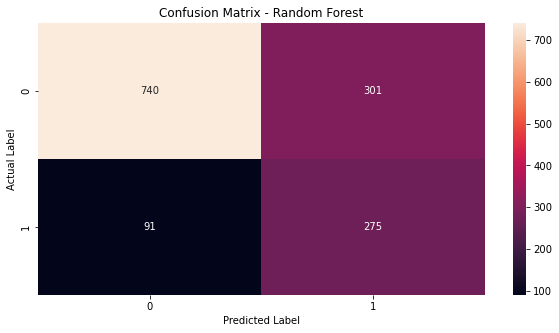

In [197]:
# Random Forest
print('Accuracy: %.2f%%' % (accuracy_score(y_test, randforest_y_predict) * 100 ))
print('Precision: %.2f%%' % (precision_score(y_test, randforest_y_predict) * 100))
print('Recall: %.2f%%' % (recall_score(y_test, randforest_y_predict) * 100))
print('F1_Score: %.2f%%' % (f1_score(y_test, randforest_y_predict) * 100))
confusion_matrix_rf = confusion_matrix(y_test, randforest_y_predict)
plt.figure(figsize=(10,5))
ax = plt.subplot()
sns.heatmap(confusion_matrix_rf, annot=True, fmt='d', ax = ax)
ax.set_xlabel('Predicted Label')
ax.set_ylabel('Actual Label')
ax.set_title('Confusion Matrix - Random Forest')
ax.xaxis.set_ticklabels(['0','1'])
ax.yaxis.set_ticklabels(['0','1'])

False Positive - Predict that customer will leave, but actually customer is staying

False Negative - Predict that customer will stay, but actually customer is leaving

Depends on business situation, either one can be more impact to the business goal.
In terms of retaining customer, false negative is impacting more to business than false positive. Because, if it is false positive, company will just spend more money to retain customers. For false negative, business thinks that customer will stay but actually leaving. So, losing actual customer is more significantly impactful.

In terms of marketing and budget spending, false positive will impact more than false negative. Because, business is predicing that customers are leaving so spending money to retain them, but actually they are staying.

In this prediction, we will focus on marketing perspectives (False Negative more than false positive)
 - Focus on accuracy & Recall

In [208]:
# K-NN Model
knn_model = KNeighborsClassifier(n_neighbors = 5) 
knn_model.fit(X_train,y_train)
knn_y_predict = knn_model.predict(X_test)

Accuracy: 67.45%
Precision: 42.68%
Recall: 73.22%
F1_Score: 53.92%


[Text(0, 0.5, '0'), Text(0, 1.5, '1')]

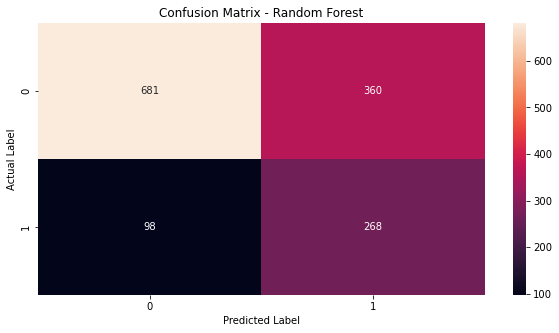

In [209]:
print('Accuracy: %.2f%%' % (accuracy_score(y_test, knn_y_predict) * 100 ))
print('Precision: %.2f%%' % (precision_score(y_test, knn_y_predict) * 100))
print('Recall: %.2f%%' % (recall_score(y_test, knn_y_predict) * 100))
print('F1_Score: %.2f%%' % (f1_score(y_test, knn_y_predict) * 100))
confusion_matrix_rf = confusion_matrix(y_test, knn_y_predict)
plt.figure(figsize=(10,5))
ax = plt.subplot()
sns.heatmap(confusion_matrix_rf, annot=True, fmt='g', ax = ax)
ax.set_xlabel('Predicted Label')
ax.set_ylabel('Actual Label')
ax.set_title('Confusion Matrix - Random Forest')
ax.xaxis.set_ticklabels(['0','1'])
ax.yaxis.set_ticklabels(['0','1'])

In [210]:
# SVC Model
svc_model = SVC(random_state = 1)
svc_model.fit(X_train,y_train)
svc_y_predict = svc_model.predict(X_test)

Accuracy: 77.33%
Precision: 55.10%
Recall: 69.40%
F1_Score: 61.43%


[Text(0, 0.5, '0'), Text(0, 1.5, '1')]

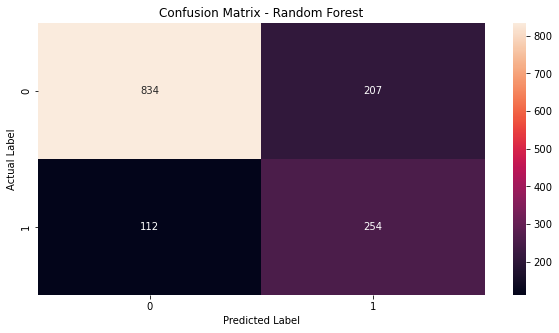

In [211]:
print('Accuracy: %.2f%%' % (accuracy_score(y_test, svc_y_predict) * 100 ))
print('Precision: %.2f%%' % (precision_score(y_test, svc_y_predict) * 100))
print('Recall: %.2f%%' % (recall_score(y_test, svc_y_predict) * 100))
print('F1_Score: %.2f%%' % (f1_score(y_test, svc_y_predict) * 100))
confusion_matrix_rf = confusion_matrix(y_test, svc_y_predict)
plt.figure(figsize=(10,5))
ax = plt.subplot()
sns.heatmap(confusion_matrix_rf, annot=True, fmt='g', ax = ax)
ax.set_xlabel('Predicted Label')
ax.set_ylabel('Actual Label')
ax.set_title('Confusion Matrix - Random Forest')
ax.xaxis.set_ticklabels(['0','1'])
ax.yaxis.set_ticklabels(['0','1'])

In [202]:
# Logistic Regression Model
lr_model = LogisticRegression()
lr_model.fit(X_train,y_train)
lr_y_pred= lr_model.predict(X_test)

Accuracy: 75.20%
Precision: 51.40%
Recall: 85.25%
F1_Score: 64.13%


[Text(0, 0.5, '0'), Text(0, 1.5, '1')]

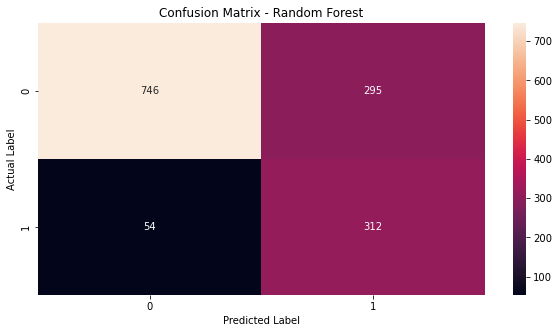

In [203]:
print('Accuracy: %.2f%%' % (accuracy_score(y_test, lr_y_pred) * 100 ))
print('Precision: %.2f%%' % (precision_score(y_test, lr_y_pred) * 100))
print('Recall: %.2f%%' % (recall_score(y_test, lr_y_pred) * 100))
print('F1_Score: %.2f%%' % (f1_score(y_test, lr_y_pred) * 100))
confusion_matrix_rf = confusion_matrix(y_test, lr_y_pred)
plt.figure(figsize=(10,5))
ax = plt.subplot()
sns.heatmap(confusion_matrix_rf, annot=True, fmt='g', ax = ax)
ax.set_xlabel('Predicted Label')
ax.set_ylabel('Actual Label')
ax.set_title('Confusion Matrix - Random Forest')
ax.xaxis.set_ticklabels(['0','1'])
ax.yaxis.set_ticklabels(['0','1'])

Comparing RandomForest, KNN, SVC, Logistic, Logistic has relatively higher accuracy and recall.

<AxesSubplot:>

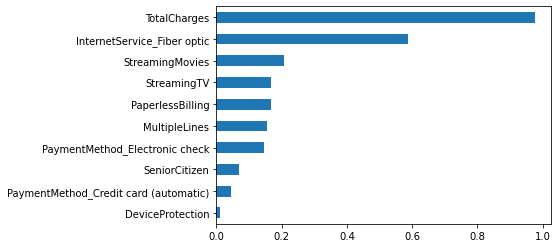

In [204]:
# Top 10 variables that affect customers to churn
importance = pd.Series(lr_model.coef_[0],
                 index=X.columns.values)
importance.sort_values()[-10:].plot(kind = 'barh')

<AxesSubplot:>

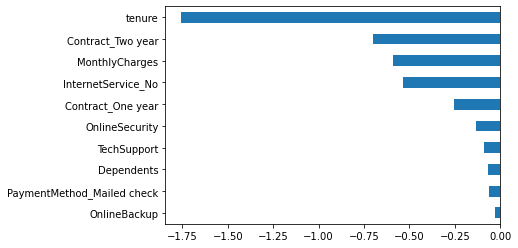

In [205]:
# Top 10 variables that affect negatively for customers to churn
importance.sort_values(ascending = False)[-10:].plot(kind='barh')

### Future Improvement
From this project, we would be able to build a predictive model using logistic regression model to predict customers to churn based on number of different variables. With our model, we have 75.20% of accuracy rate of predicting customers who would churn, and has 51.4% for precision and 85.25% for recall. Although it has reasonably good performing model, there are still rooms for improvement.
- Further develop with feature engineering to remove / add features to improve the performance.
- More parameter tuning for each models. E.g. in random forest, we can tune more number of trees. With various parameter tuning, there can be other models that may perform better.